In [20]:
import numpy as np
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons
from helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ex. 0 Getting Started: Soma Compartment

In [2]:
# defining global constants
E_L = -70 * b2.mV # resting membrane potential
# defining constants for soma
TAU_s = 16 * b2.ms # somatic membrane time scale
TAU_w_s = 100 * b2.ms # somatic adaptation time scale
C_s = 370 * b2.pF # somatic membrane capacitance
E_th = -50 * b2.mV # spike threshold
b_w_s = -200 * b2.pA # used to update w after spike event
T_ref = 3*b2.ms # refractory period

### 0.1
Stimulate the neuron with a step current of 80ms. Create a figure of three plots: the input
I(s) on the top, voltage v(s) in the middle, and adaptation term w(s) at bottom. Find the minimum
amplitude (in nA, round to the second decimal) required to trigger spike. Make sure these variables
are stored in the ‘StateMonitor’ of your model function

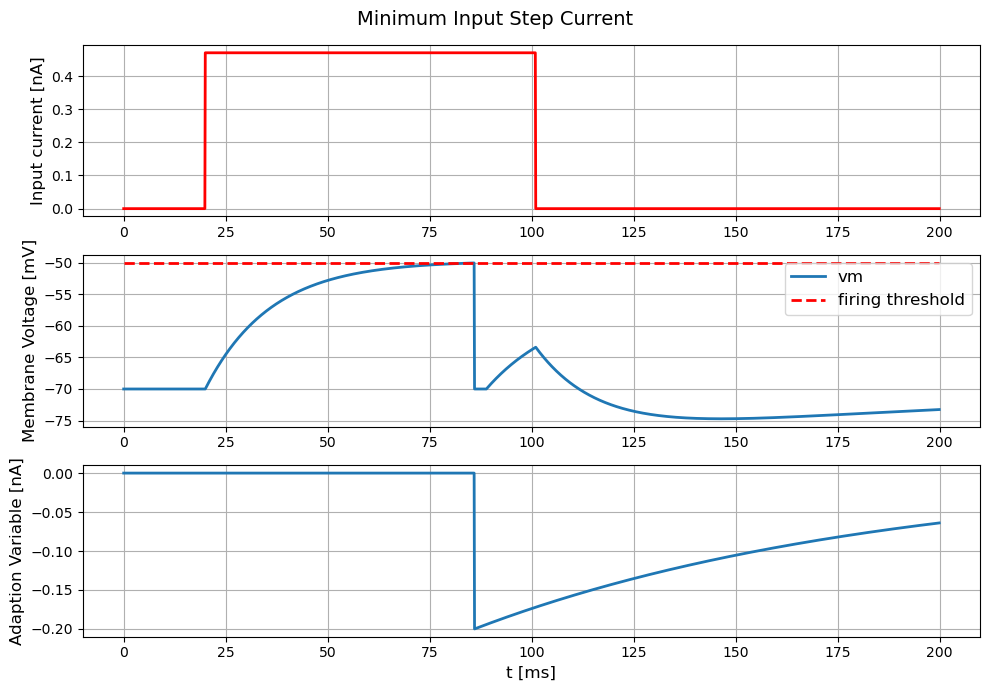

nr of spikes: 1


In [52]:
# Step current of 80ms with I_min (here we find 0.47 nA)
step_current = input_factory.get_step_current(t_start=20, t_end=100, unit_time=b2.ms, amplitude=0.47*b2.nA)
(state_monitor,spike_monitor) = simulate_soma(tau_s=TAU_s, C=C_s, v_rest=E_L, b=b_w_s, v_spike=E_th, tau_w=TAU_w_s, I_stim=step_current, T_refractory=T_ref)
# plot I and vm
plot_I_v_w(state_monitor, step_current, title="Minimum Input Step Current", firing_threshold=E_th, savefig=True)
print("nr of spikes: {}".format(spike_monitor.count[0]))

### 0.2
Stimulate with a moderately large step current to get at least 5 spikes. Plot the spike train,
what is the role of the adaptive term w(s)?

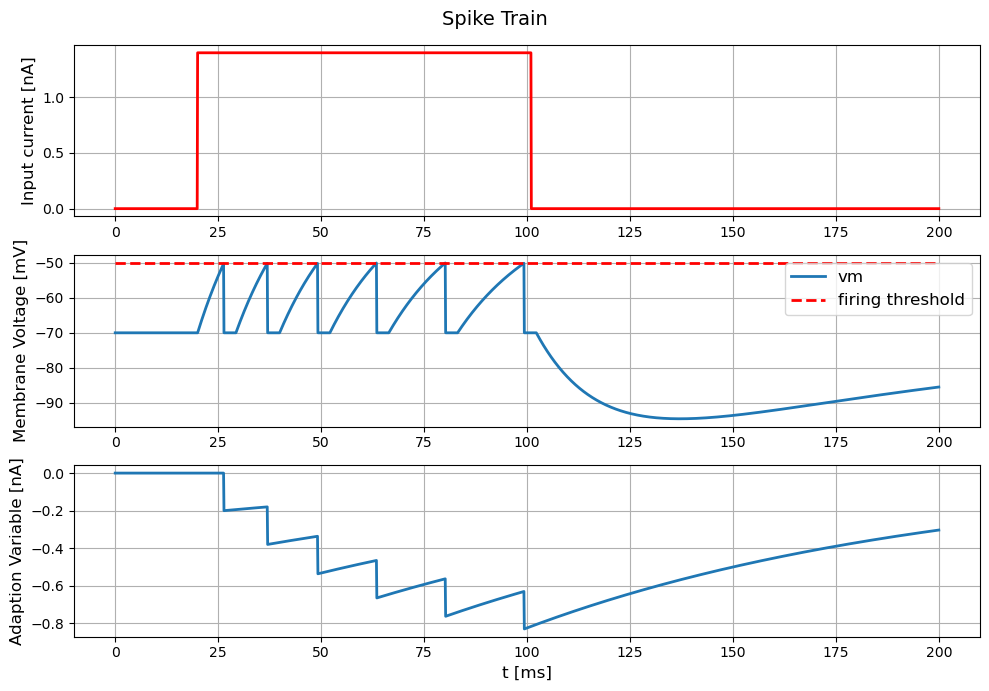

nr of spikes: 6


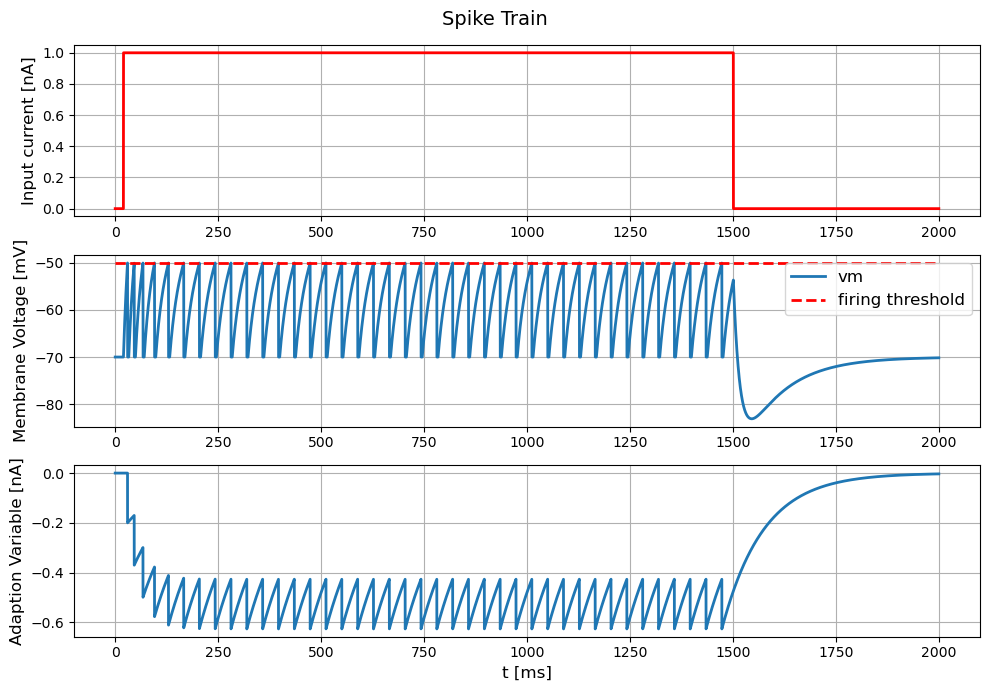

nr of spikes: 40


In [62]:
step_current = input_factory.get_step_current(t_start=20, t_end=100, unit_time=b2.ms, amplitude=1.4*b2.nA)
(state_monitor,spike_monitor) = simulate_soma(tau_s=TAU_s, C=C_s, v_rest=E_L, b=b_w_s, v_spike=E_th, tau_w=TAU_w_s, I_stim=step_current, T_refractory=T_ref)
# plot I and vm
plot_I_v_w(state_monitor, step_current, title="Spike Train", firing_threshold=E_th, savefig=False)
print("nr of spikes: {}".format(spike_monitor.count[0]))


#test pour rép à la question
step_current = input_factory.get_step_current(t_start=20, t_end=1500, unit_time=b2.ms, amplitude=1*b2.nA)
(state_monitor,spike_monitor) = simulate_soma(tau_s=TAU_s, C=C_s, v_rest=E_L, b=b_w_s, v_spike=E_th, tau_w=TAU_w_s, I_stim=step_current, T_refractory=T_ref, simulation_time=2000 * b2.ms)
# plot I and vm
plot_I_v_w(state_monitor, step_current, title="Spike Train", firing_threshold=E_th, savefig=False)
print("nr of spikes: {}".format(spike_monitor.count[0]))

# Ex 1. Dendritic Compartment

In [3]:
# defining dendritic constants
TAU_d = 8 * b2.ms # dendritic membrane time scale
TAU_w_d = 30 * b2.ms # dendritic adaptation time scale
C_d = 170 * b2.pF # dendritic membrane capacitance
E_d = -38 * b2.mV
D_d = 6 * b2.mV
a_w_d = -13 * b2.nS
g_d = 1200 * b2.pA

### 1.1
Inject a step current lasting 100ms. Produce figures with plots of I(d), v(d), w(d) for the following stimulation currents: 0.4nA and 0.45nA. How does the dendrite behave when stimulated with the higher current? Stimulate now with 1.5nA, do you see the same effect?

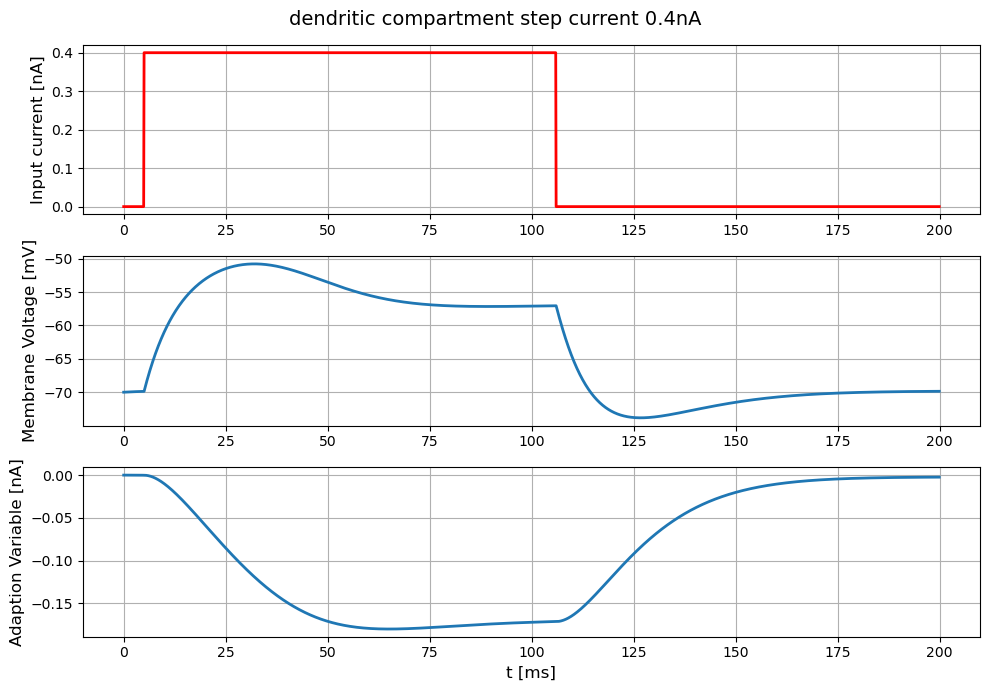

In [6]:
step_current1 = input_factory.get_step_current(t_start=5, t_end=105, unit_time=b2.ms, amplitude=0.4*b2.nA)
state_monitor1= simulate_dendritic(tau_d=TAU_d, C=C_d, v_rest=E_L, a=a_w_d, tau_w=TAU_w_d, E_d=E_d, D_d=D_d, g=g_d, I_stim=step_current1)
plot_I_v_w(state_monitor1, step_current1, title="dendritic compartment step current 0.4nA", savefig=False)

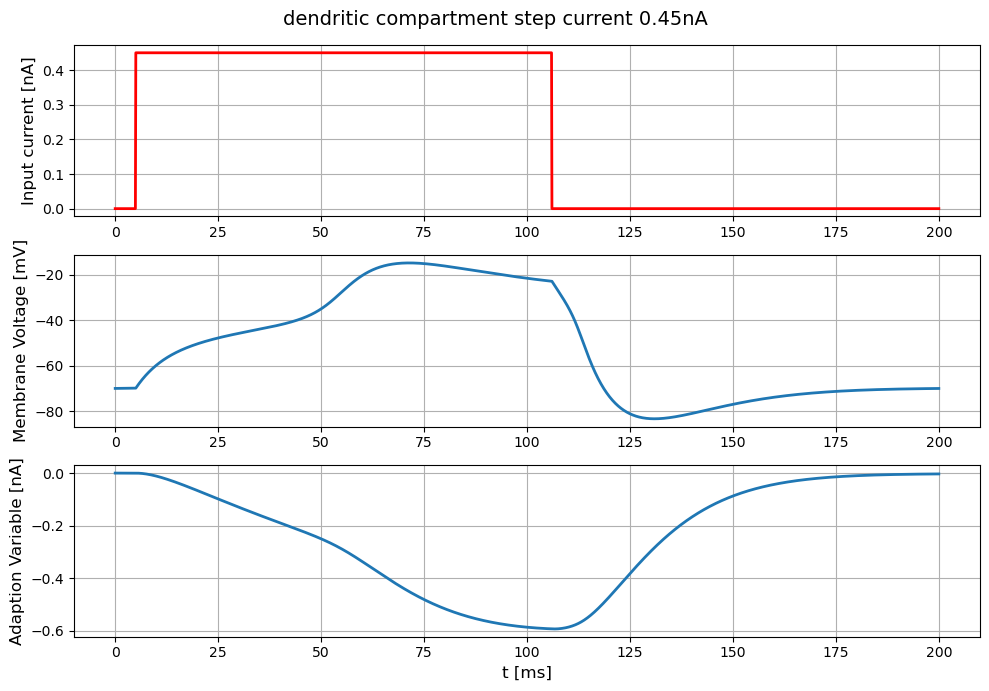

In [4]:
step_current2 = input_factory.get_step_current(t_start=5, t_end=105, unit_time=b2.ms, amplitude=0.45*b2.nA)
state_monitor2 = simulate_dendritic(tau_d=TAU_d, C=C_d, v_rest=E_L, a=a_w_d, tau_w=TAU_w_d, E_d=E_d, D_d=D_d, g=g_d, I_stim=step_current2)
plot_I_v_w(state_monitor2, step_current2, title="dendritic compartment step current 0.45nA", savefig=False)

It first increases to -50mV, then evolves almost linearly (and slowly) to approximately -30mV, and finally we have a second steep increase. The max voltage is reached in 2 steps (unlike 0.4nA stimulation)

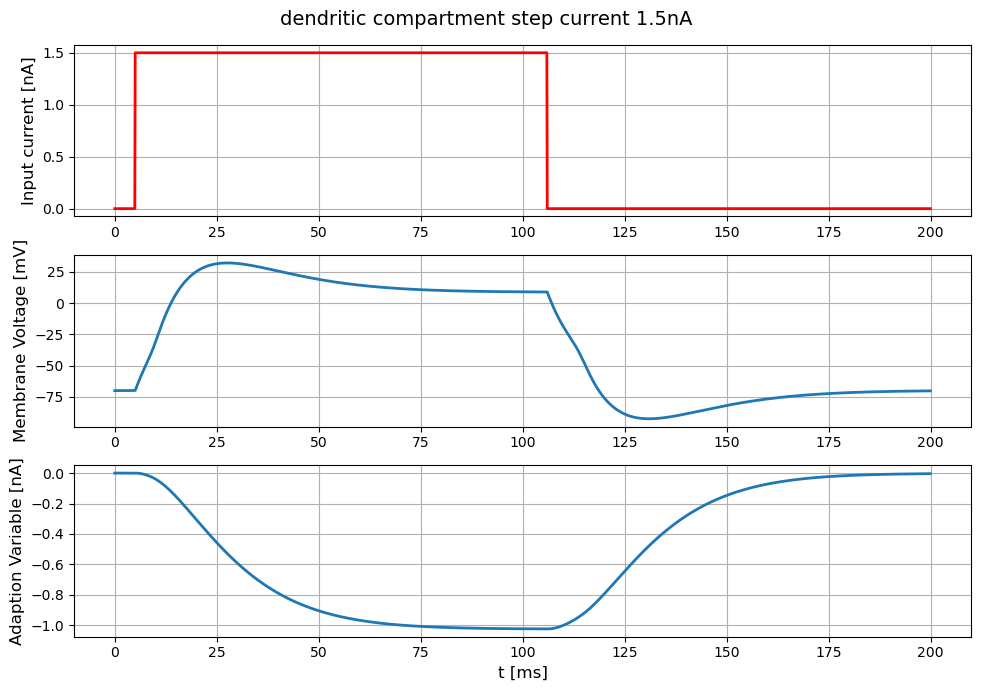

In [10]:
step_current3 = input_factory.get_step_current(t_start=5, t_end=105, unit_time=b2.ms, amplitude=1.5*b2.nA)
state_monitor3 = simulate_dendritic(tau_d=TAU_d, C=C_d, v_rest=E_L, a=a_w_d, tau_w=TAU_w_d, E_d=E_d, D_d=D_d, g=g_d, I_stim=step_current3)
plot_I_v_w(state_monitor3, step_current3, title="dendritic compartment step current 1.5nA", savefig=False)

With 1.5nA stimulation, we observe a voltage curve similar to the stimulation with 4nA in its shape. So we don't see the 2-step increase as in the 0.45nA stimulation

### 1.2
From the simulations of task 1.1, take the voltage trace of the rising part (from the time of current injection until the voltage roughly reaches peak) and plot it against its finite difference derivative, i.e. V[t] = V [t]−V [t−1]. What difference do you observe in the shapes of these voltage derivative curve? Could you use the difference to explain the second voltage rise that we see for 0.45nA stimulation in task 1.1? Why does the plateau disappear for 1.5nA stimulation? Hint:what is the shape of f(v) in the equation?

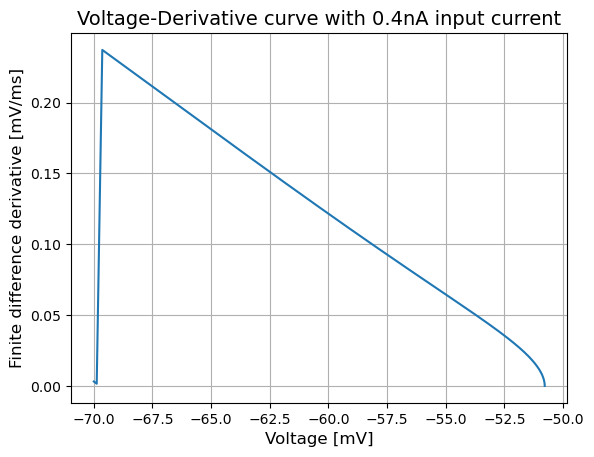

In [7]:
# From sim 1 with current 0.4 nA
rising_voltage1 = extract_rising_voltage_trace(state_monitor1)
finite_derivative1 = compute_finite_derivative(rising_voltage1)
plot_voltage_derivative_curve(rising_voltage1[1:], finite_derivative1[1:], "Voltage-Derivative curve with 0.4nA input current")

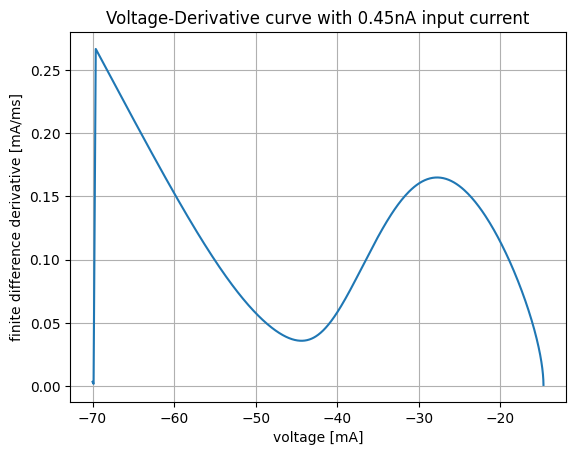

In [13]:
# From sim 2 with current 0.45 nA
rising_voltage2 = extract_rising_voltage_trace(state_monitor2)
finite_derivative2 = compute_finite_derivative(rising_voltage2)
plot_voltage_derivative_curve(rising_voltage2[1:], finite_derivative2[1:], "Voltage-Derivative curve with 0.45nA input current")

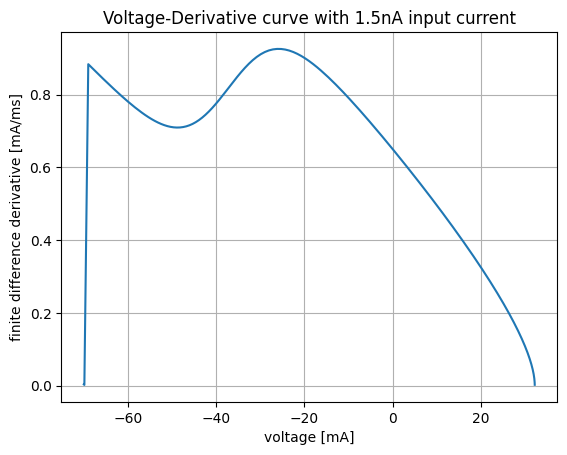

In [14]:
# From sim 3 with current 1.5 nA
rising_voltage3 = extract_rising_voltage_trace(state_monitor3)
finite_derivative3 = compute_finite_derivative(rising_voltage3)
plot_voltage_derivative_curve(rising_voltage3[1:], finite_derivative3[1:], "Voltage-Derivative curve with 1.5nA input current")

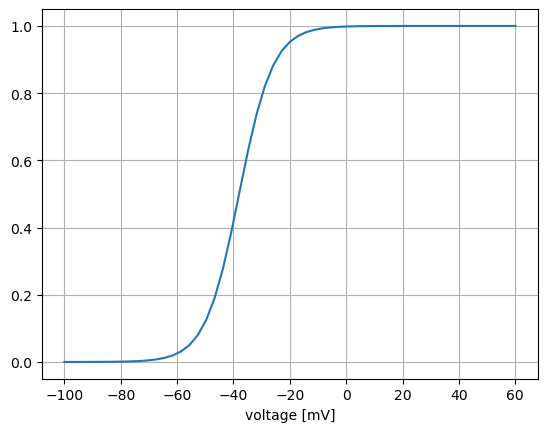

In [8]:
plot_sigmoid(np.linspace(-0.1, 0.06, 55), E_d, D_d)

Each derivative curve corresponds to a different part of the sigmoid function
Second voltage rise: derivative first steep, then down then steep up again -> first half of sigmoid
No plateau for third because derivative barely goes down before going up again -> almost whole sigmoid

### 1.3
f(v) is used to model a dendritic spike, which is known to be lasting longer than a somatic spike. Change the parameters to:
– Have the dendritic spike happen with less current.
– Increase the spike plateau potential when the current injection is fixed at 0.45nA.
Motivate your choices.

In order to have the dendritic spike (over the soma happen with less current we need to shift the sigmoid towards the left (smaller voltages). The position of the sigmoid on the x-axis is modulated by the parameter E_d, decreasing it will lead to a sigmoid shifted to the left and thus to a spike happening with less current (lower voltage will lead to a spike)

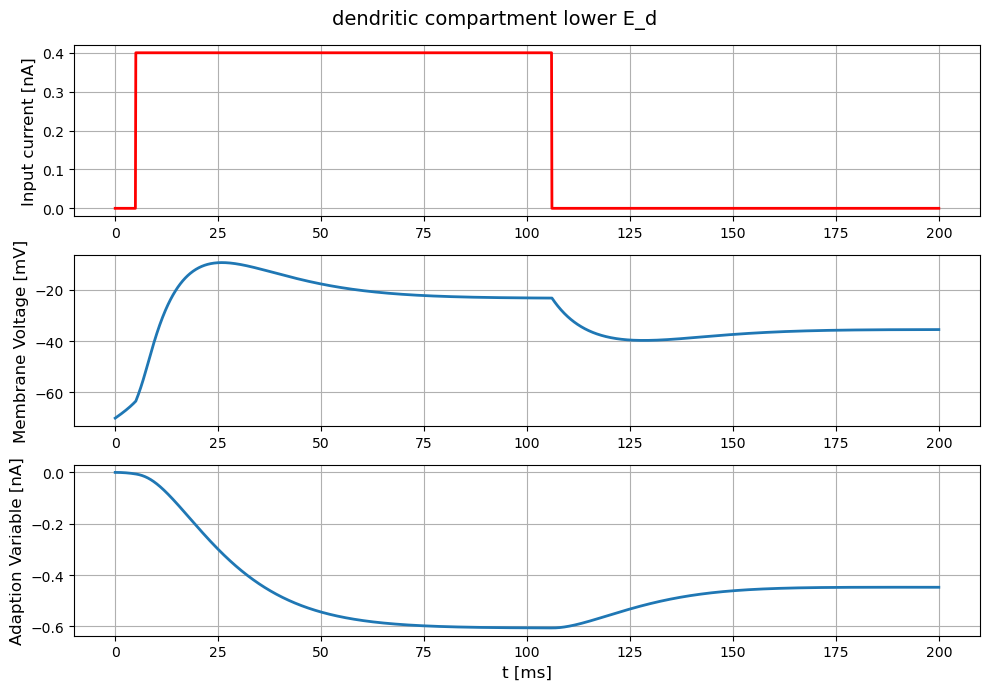

-9.47934223 * mvolt

In [38]:
low_E_d = -60 * b2.mV
step_current4 = input_factory.get_step_current(t_start=5, t_end=105, unit_time=b2.ms, amplitude=0.4*b2.nA)
state_monitor4 = simulate_dendritic(tau_d=TAU_d, C=C_d, v_rest=E_L, a=a_w_d, tau_w=TAU_w_d, E_d=low_E_d, D_d=D_d, g=g_d, I_stim=step_current4)
plot_I_v_w(state_monitor4, step_current4, title="dendritic compartment lower E_d", savefig=False)

np.max(state_monitor4.v)

# plot_sigmoid(np.linspace(-0.15, 0.06, 100), low_E_d, D_d)

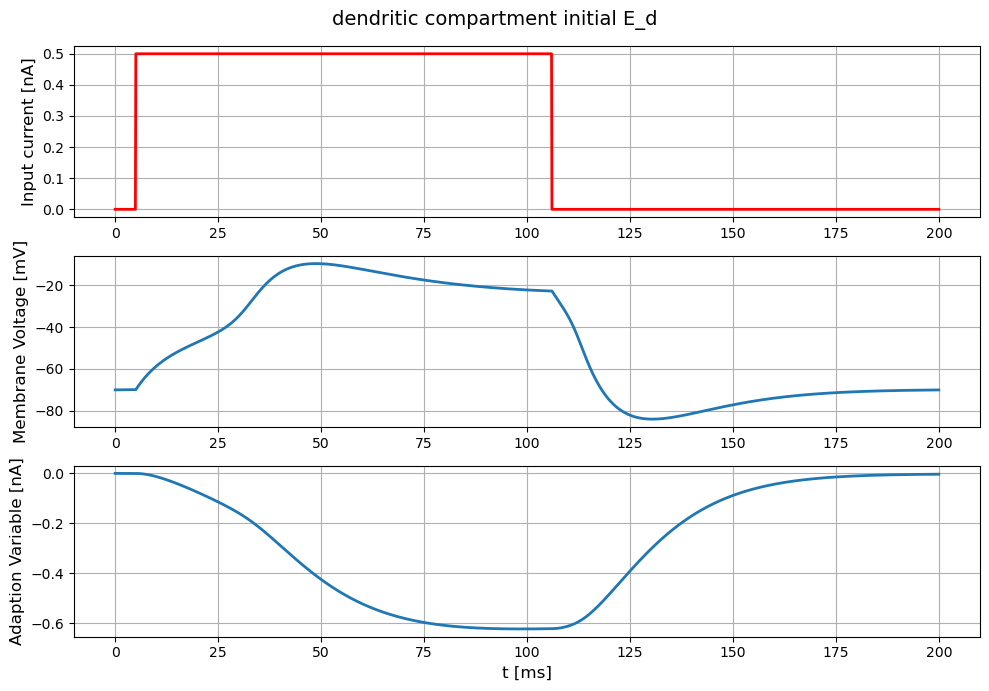

-9.70348714 * mvolt

In [44]:
step_current5 = input_factory.get_step_current(t_start=5, t_end=105, unit_time=b2.ms, amplitude=0.5*b2.nA)
state_monitor5 = simulate_dendritic(tau_d=TAU_d, C=C_d, v_rest=E_L, a=a_w_d, tau_w=TAU_w_d, E_d=E_d, D_d=D_d, g=g_d, I_stim=step_current5)
plot_I_v_w(state_monitor5, step_current5, title="dendritic compartment initial E_d", savefig=False)
np.max(state_monitor5.v)

Here we see that when we change the constant E_d to a lower value we have a spike with a current of 0.4nA which is not the case with the initial E_d value


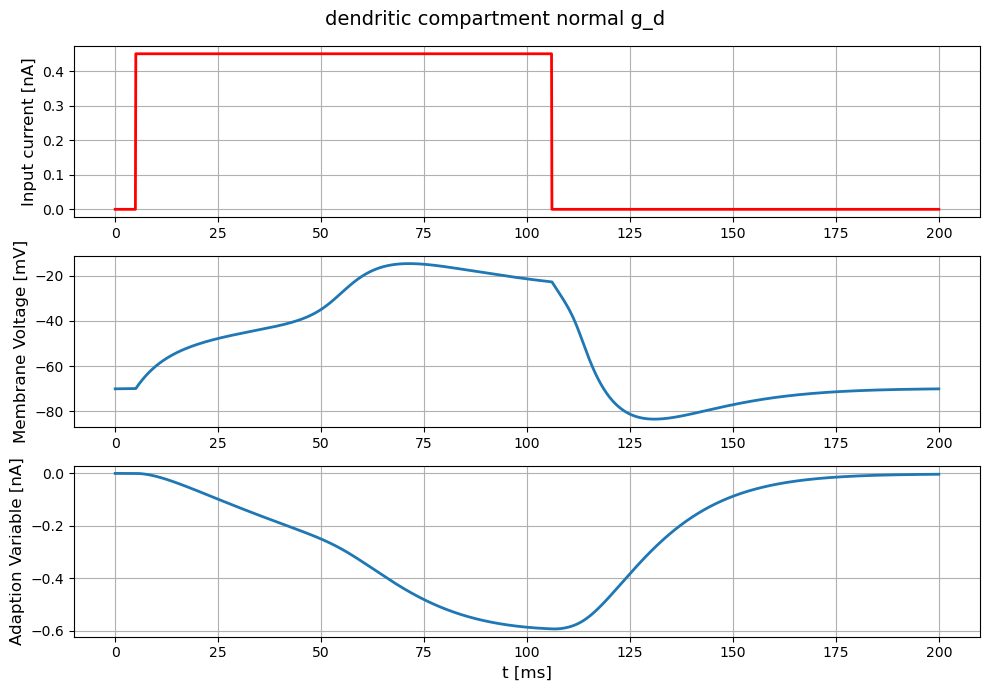

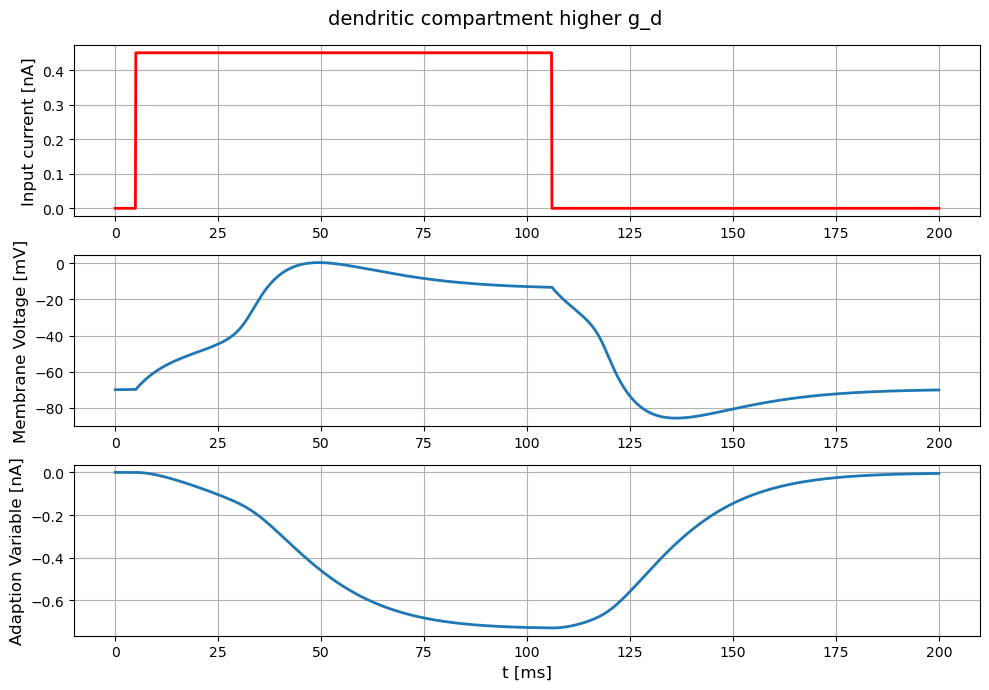

In [46]:
step_current = input_factory.get_step_current(t_start=5, t_end=105, unit_time=b2.ms, amplitude=0.45 * b2.nA)
state_monitor = simulate_dendritic(tau_d=TAU_d, C=C_d, v_rest=E_L, a=a_w_d, tau_w=TAU_w_d, E_d=E_d, D_d=D_d, g=g_d, I_stim=step_current)
plot_I_v_w(state_monitor, step_current, title="dendritic compartment normal g_d", savefig=False)

g_d_2 = 1500 * b2.pA
step_current = input_factory.get_step_current(t_start=5, t_end=105, unit_time=b2.ms, amplitude=0.45 * b2.nA)
state_monitor = simulate_dendritic(tau_d=TAU_d, C=C_d, v_rest=E_L, a=a_w_d, tau_w=TAU_w_d, E_d=E_d, D_d=D_d, g=g_d_2, I_stim=step_current)
plot_I_v_w(state_monitor, step_current, title="dendritic compartment higher g_d", savefig=False)

# Ex. 2 - Two Compartment Model

In [2]:
# defining global constants
E_L = -70 * b2.mV # resting membrane potential
# defining constants for soma
TAU_s = 16 * b2.ms # somatic membrane time scale
TAU_w_s = 100 * b2.ms # somatic adaptation time scale
C_s = 370 * b2.pF # somatic membrane capacitance
E_th = -50 * b2.mV # spike threshold
b_w_s = -200 * b2.pA # used to update w after spike event
T_ref = 3*b2.ms # refractory period

# defining dendritic constants
TAU_d = 8 * b2.ms # dendritic membrane time scale
TAU_w_d = 30 * b2.ms # dendritic adaptation time scale
C_d = 170 * b2.pF # dendritic membrane capacitance
E_d = -38 * b2.mV
D_d = 6 * b2.mV
a_w_d = -13 * b2.nS
g_d = 1200 * b2.pA

In [26]:
step_current = input_factory.get_step_current(t_start=5, t_end=105, unit_time=b2.ms, amplitude=1 * b2.nA)

step_current

In [27]:
state_monitor = simulate_pyramidal_neuron(tau_s = TAU_s, tau_d = TAU_d, C_s = C_s, C_d = C_d, v_rest = E_L, b= b_w_s, v_spike = E_th, tau_w_s = TAU_w_s,
                                          tau_w_d = TAU_w_d, I = step_current, a = a_w_d, E_d = E_d, D_d = D_d, g = g_d, T_refractory = T_ref)

state_monitor

<StateMonitor, recording ['v_s', 'v_d', 'w_s', 'w_d'] from neurongroup_1>

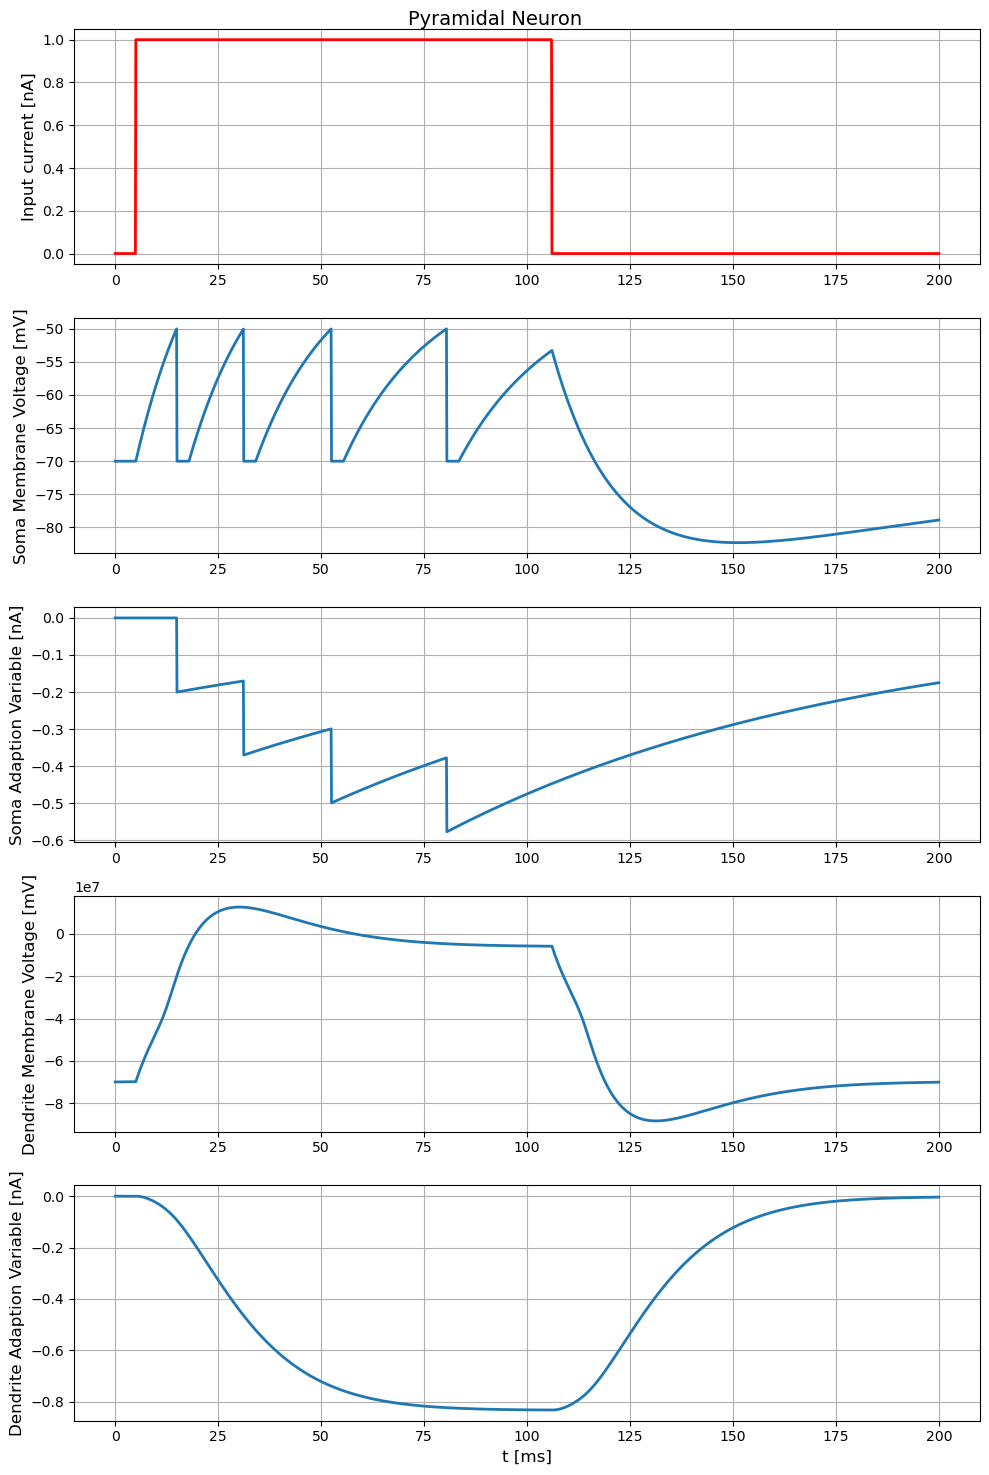

In [28]:
plot_pyramidal(state_monitor, step_current, title="Pyramidal Neuron", savefig=False)